In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import numpy as np

In [45]:
df = pd.read_excel('/content/Quitar tendencia.xlsx', header = 0)
df

,Fecha,USO,PROF,ACCESO,FINDEX,GLOBAL,BANKCON,FINOP
0,2001-03-31,4.760516,-2.870854,-1.436736,-3.807952,12.476667,1634.992153,10.244489
1,2001-06-30,4.619391,-2.942477,-1.409869,-3.796076,12.200000,1649.718781,9.878376
2,2001-09-30,4.738808,-2.928419,-1.406424,-3.821973,12.706667,1621.507379,9.289471
3,2001-12-31,4.616833,-2.799275,-1.386445,-3.698861,13.203333,1598.407074,7.806468
4,2002-03-31,3.818590,-2.763255,-1.390579,-3.439288,12.993333,1567.965812,7.522508
...,...,...,...,...,...,...,...,...
82,2021-09-30,-0.155414,1.307032,0.880774,1.232960,15.193333,2128.259869,14.002105
83,2021-12-31,-0.419392,1.386735,0.844950,1.343564,15.016667,2112.999836,12.507705
84,2022-03-31,-0.473067,1.565242,0.829794,1.459574,14.810000,2091.711484,9.773907
85,2022-06-30,-0.395853,1.681651,0.822216,1.502557,14.910000,2071.838935,10.539341


In [35]:
# Descomposición aditiva
result = seasonal_decompose(df['FINDEX'], model='additive', period=4)  # Ajusta el periodo según tus datos
df['tendencia'] = result.trend
df['sin_tendencia'] = result.resid
df['sin_tendencia']

,sin_tendencia
0,NaN
1,NaN
2,-0.084761
3,-0.088373
4,-0.051786
...,...
82,-0.002458
83,0.015537
84,0.024633
85,NaN


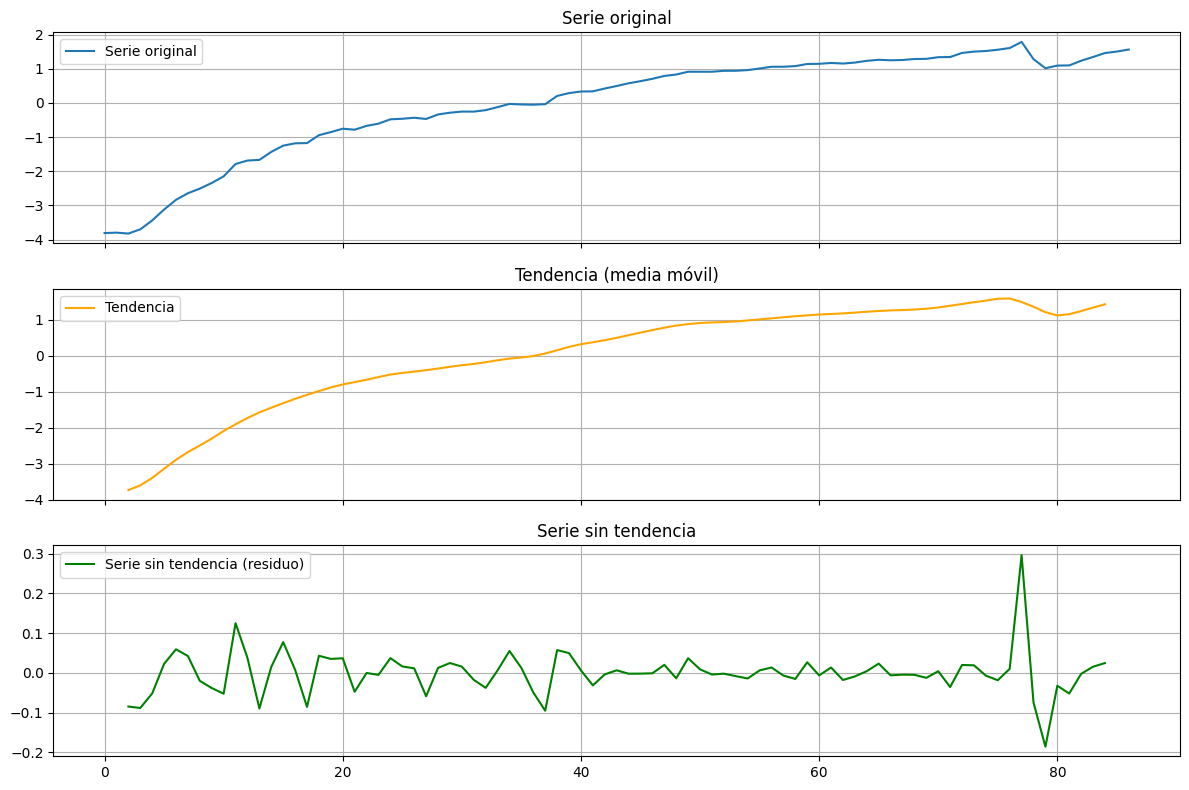

In [36]:
import matplotlib.pyplot as plt

# Asume que ya hiciste seasonal_decompose y tienes "result"
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

axes[0].plot(df['FINDEX'], label='Serie original')
axes[0].set_title('Serie original')

axes[1].plot(df['tendencia'], label='Tendencia', color='orange')
axes[1].set_title('Tendencia (media móvil)')

axes[2].plot(df['sin_tendencia'], label='Serie sin tendencia (residuo)', color='green')
axes[2].set_title('Serie sin tendencia')

for ax in axes:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


In [42]:
df['tendencia_movil'] = df['FINDEX'].rolling(window=4, center=True).mean()
df['residuo_movil'] = df['FINDEX'] - df['tendencia_movil']
df['residuo_movil']

,residuo_movil
0,NaN
1,NaN
2,-0.040757
3,-0.009812
4,0.080607
...,...
82,0.041387
83,0.060143
84,0.074910
85,0.035510


In [ ]:
df['residuo_pct'] = 100 * df['residuo_movil'] / df['tendencia_movil']

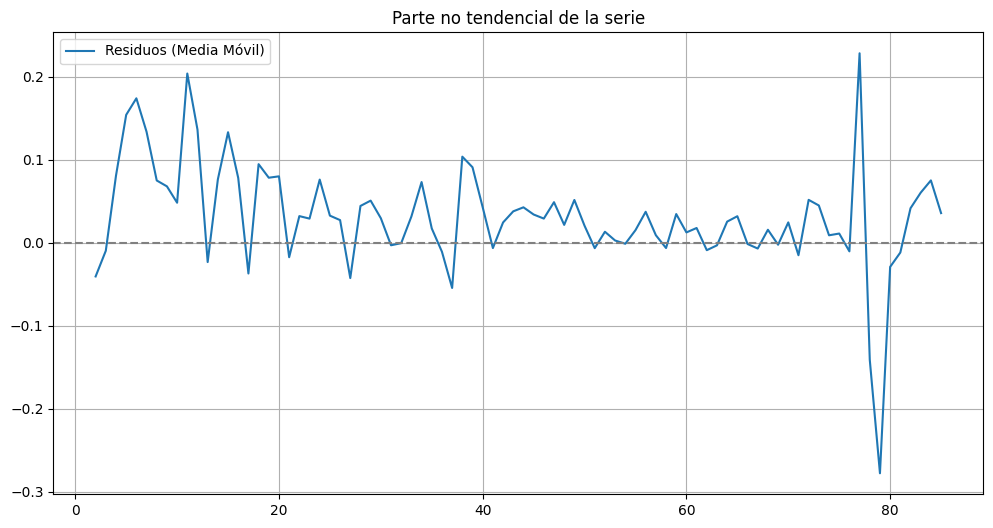

In [43]:
plt.figure(figsize=(12,6))
plt.plot(df['residuo_movil'], label='Residuos (Media Móvil)')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.title('Parte no tendencial de la serie')
plt.grid(True)
plt.show()


In [44]:
df['residuo_movil'].to_excel('Findex sin tendencia (media movil).xlsx')

In [49]:
df = pd.read_excel('/content/Quitar tendencia.xlsx', header = 0)
df

,Fecha,USO,PROF,ACCESO,FINDEX,GLOBAL,BANKCON,FINOP
0,2001-03-31,4.760516,-2.870854,-1.436736,-3.807952,12.476667,1634.992153,10.244489
1,2001-06-30,4.619391,-2.942477,-1.409869,-3.796076,12.200000,1649.718781,9.878376
2,2001-09-30,4.738808,-2.928419,-1.406424,-3.821973,12.706667,1621.507379,9.289471
3,2001-12-31,4.616833,-2.799275,-1.386445,-3.698861,13.203333,1598.407074,7.806468
4,2002-03-31,3.818590,-2.763255,-1.390579,-3.439288,12.993333,1567.965812,7.522508
...,...,...,...,...,...,...,...,...
82,2021-09-30,-0.155414,1.307032,0.880774,1.232960,15.193333,2128.259869,14.002105
83,2021-12-31,-0.419392,1.386735,0.844950,1.343564,15.016667,2112.999836,12.507705
84,2022-03-31,-0.473067,1.565242,0.829794,1.459574,14.810000,2091.711484,9.773907
85,2022-06-30,-0.395853,1.681651,0.822216,1.502557,14.910000,2071.838935,10.539341


In [50]:
# Suponiendo que la primera columna es la de fechas y el resto son numéricas
variables = df.columns[1:]  # Ignorar la primera columna (fechas o índice)
residuos = pd.DataFrame()
residuos[df.columns[0]] = df[df.columns[0]]  # Mantener la columna de fechas

# Aplicar media móvil y calcular residuo para cada variable
for var in variables:
    tendencia = df[var].rolling(window=4, center=True).mean()
    residuos[f'{var}_resid'] = df[var] - tendencia

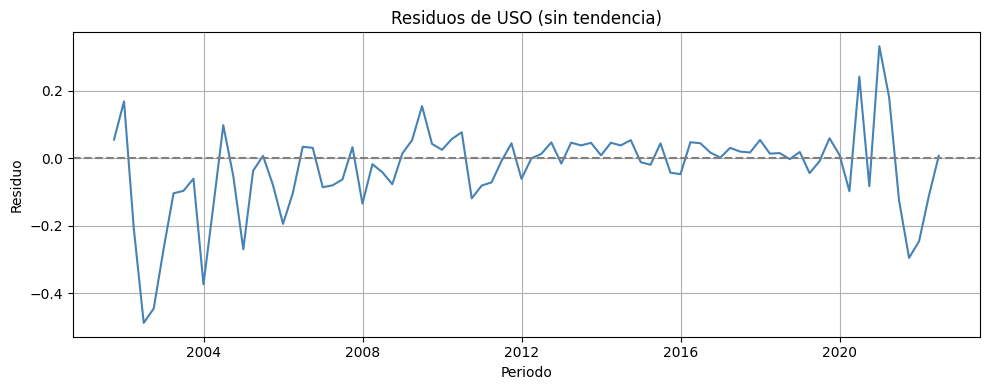

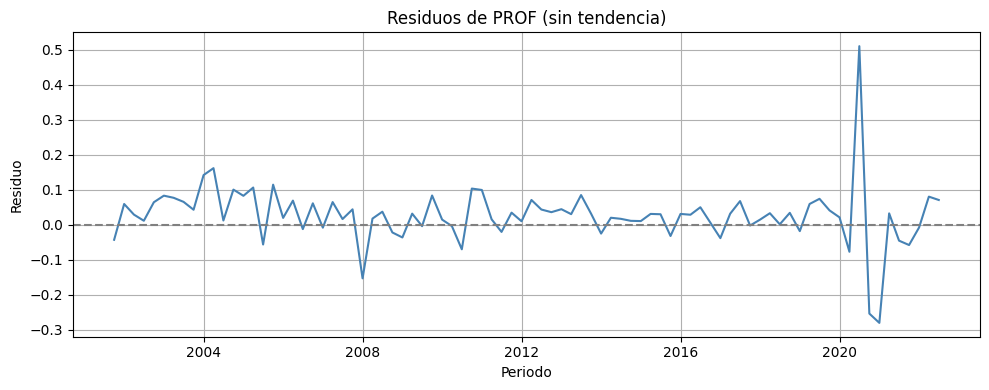

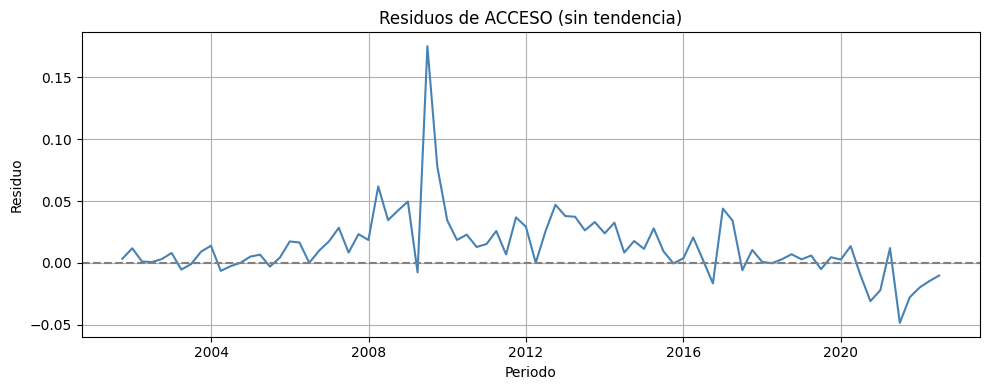

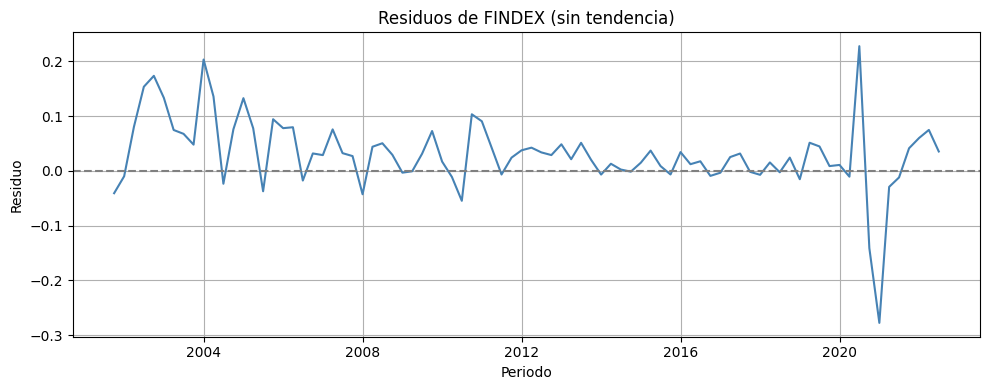

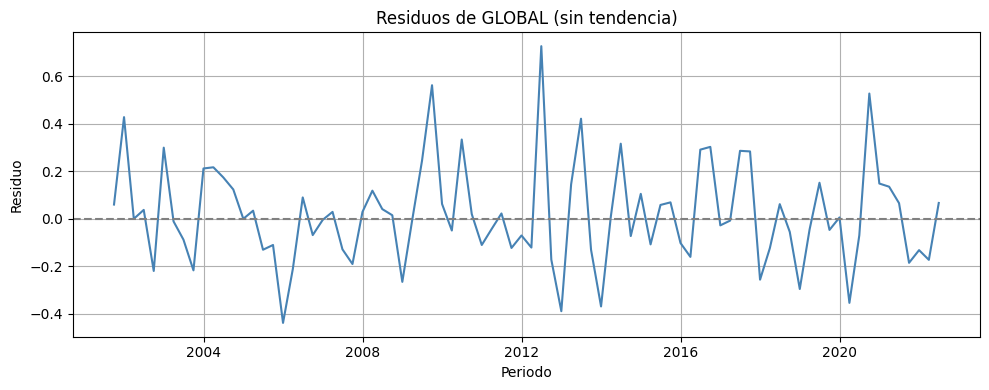

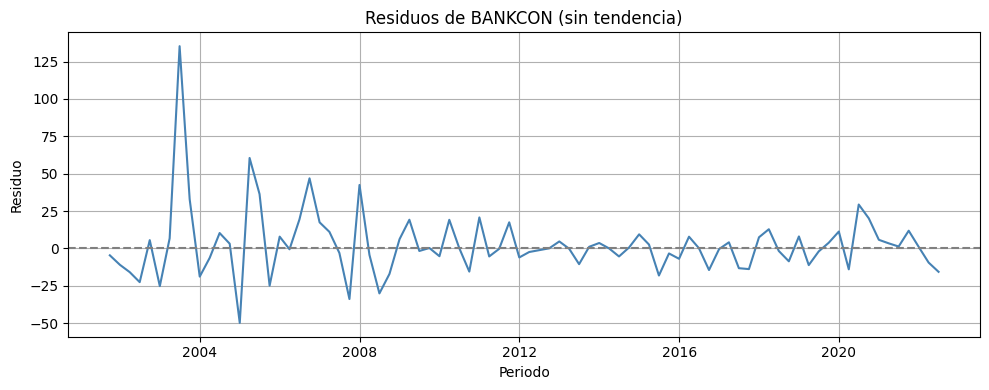

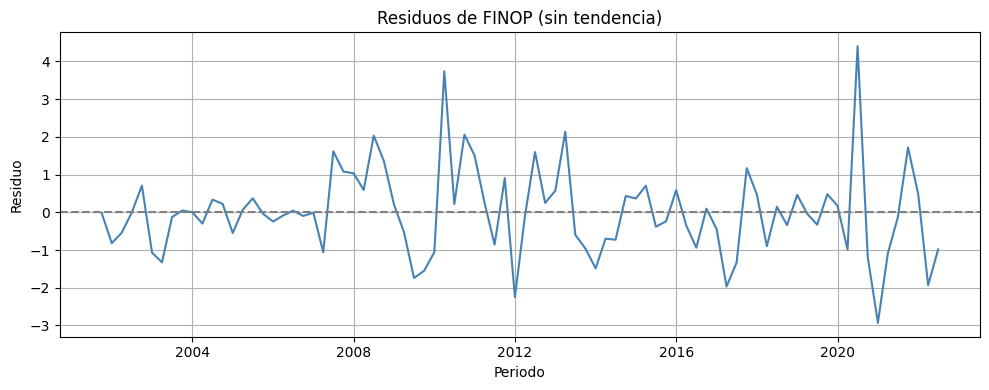

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que la primera columna es fecha o periodo
fecha_col = df.columns[0]
variables = df.columns[1:]

# DataFrame para residuos
residuos = pd.DataFrame()
residuos[fecha_col] = df[fecha_col]

# Calcular residuos (serie menos tendencia por media móvil)
for var in variables:
    tendencia = df[var].rolling(window=4, center=True).mean()
    residuos[f'{var}_resid'] = df[var] - tendencia

# Graficar un subplot por cada variable
for var in variables:
    plt.figure(figsize=(10, 4))
    plt.plot(residuos[fecha_col], residuos[f'{var}_resid'], color='steelblue')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f'Residuos de {var} (sin tendencia)')
    plt.xlabel('Periodo')
    plt.ylabel('Residuo')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Exportar residuos a Excel
residuos.to_excel("Sin_tendencia.xlsx", index=False)


In [53]:
residuos.to_excel("Sin_tendencia.xlsx", index=False)